In [ ]:
#Theoretical

""""1. Can we use Bagging for regression problems?
Yes, Bagging (Bootstrap Aggregating) can be used for regression problems. In this case, multiple regression models are trained on different bootstrap samples of the data, and their predictions are averaged to produce the final output. This helps reduce variance and improves generalization.

2. What is the difference between multiple model training and single model training?
Single model training uses one model trained on the entire dataset.

Multiple model training (used in ensemble methods) involves training several models (e.g., on bootstrapped subsets) and combining their predictions, often resulting in better performance and robustness.

3. Explain the concept of feature randomness in Random Forest.
In a Random Forest, each tree is built using a random subset of features at each split (not all features). This feature randomness helps in decorrelating the trees, making the ensemble more diverse and reducing overfitting.

4. What is OOB (Out-of-Bag) Score?
Out-of-Bag score is a validation method in bagging where each base model is evaluated on the data not included in its training sample. It provides an unbiased estimate of model performance without needing a separate validation set.

5. How can you measure the importance of features in a Random Forest model?
Feature importance can be measured by:

Gini importance: How much each feature decreases impurity across all trees.

Permutation importance: Randomly shuffling a feature's values and observing the impact on performance.

6. Explain the working principle of a Bagging Classifier.
A Bagging Classifier:

Trains multiple models (e.g., decision trees) on different bootstrapped samples.

Aggregates predictions using majority voting (for classification).

Reduces variance and improves model stability.

7. How do you evaluate a Bagging Classifier’s performance?
You can evaluate it using:

Accuracy, Precision, Recall, F1-score on a test set.

Confusion matrix for classification performance.

OOB score as an internal validation metric.

8. How does a Bagging Regressor work?
A Bagging Regressor trains several regressors on bootstrapped data. Final predictions are made by averaging the outputs of these models, reducing overfitting and improving accuracy.

9. What is the main advantage of ensemble techniques?
The main advantage is improved accuracy and robustness by combining multiple models, often outperforming individual models in both bias and variance trade-offs.

10. What is the main challenge of ensemble methods?
Main challenges include:

Increased computational cost.

Model interpretability decreases with complexity.

Risk of overfitting if not properly validated.

11. Explain the key idea behind ensemble techniques.
The key idea is to combine multiple weak learners to build a stronger overall model, leveraging the wisdom of crowds effect to reduce errors from individual models.

12. What is a Random Forest Classifier?
It’s an ensemble of decision trees trained using bagging with feature randomness. Each tree votes, and the class with the most votes is the output. It’s robust and handles overfitting better than a single tree.

13. What are the main types of ensemble techniques?
Bagging (e.g., Random Forest)

Boosting (e.g., AdaBoost, XGBoost)

Stacking (meta-model learns how to best combine base models)

14. What is ensemble learning in machine learning?
Ensemble learning combines multiple models (learners) to solve a problem more effectively than a single model. It enhances performance through diversity and collaboration.

15. When should we avoid using ensemble methods?
Avoid when:

Computational resources are limited.

The base model already performs well.

Model interpretability is crucial.

Real-time inference speed is critical.

16. How does Bagging help in reducing overfitting?
Bagging reduces overfitting by averaging multiple models, which cancels out the noise and variance from individual models trained on different data subsets.

17. Why is Random Forest better than a single Decision Tree?
It reduces overfitting through averaging.

Improves accuracy and generalization.

Is more robust to noise and outliers.

18. What is the role of bootstrap sampling in Bagging?
Bootstrap sampling generates multiple training datasets by sampling with replacement. It introduces diversity among the models and helps generalize better.

19. What are some real-world applications of ensemble techniques?
Fraud detection (banking)

Spam filtering

Medical diagnosis

Customer churn prediction

Recommender systems

Stock market prediction

20. What is the difference between Bagging and Boosting?
Feature	Bagging	Boosting
Training	Independent models on bootstrapped samples	Sequential models focusing on previous errors
Goal	Reduce variance	Reduce bias
Model combination	Voting/Averaging	Weighted combination
Overfitting risk	Lower	Higher (but can be tuned)
Example	Random Forest	AdaBoost, Gradient Boosting

"""""

In [ ]:
#Practical

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression, load_breast_cancer
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (accuracy_score, mean_squared_error, roc_auc_score, classification_report,
                             precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay,
                             precision_recall_curve, auc)


In [13]:
# Create sample classification and regression datasets
X_clf, y_clf = make_classification(n_samples=1000, n_features=20, random_state=42)
X_reg, y_reg = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [14]:
# 1. Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_clf.fit(X_train_clf, y_train_clf)
print("1. Bagging Classifier Accuracy:", accuracy_score(y_test_clf, bagging_clf.predict(X_test_clf)))


1. Bagging Classifier Accuracy: 0.885


In [15]:

# 2. Bagging Regressor with Decision Trees
bagging_reg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_reg.fit(X_train_reg, y_train_reg)
print("2. Bagging Regressor MSE:", mean_squared_error(y_test_reg, bagging_reg.predict(X_test_reg)))


2. Bagging Regressor MSE: 3222.395831454


In [16]:

# 3. Random Forest on Breast Cancer Data
data = load_breast_cancer()
X_bc, y_bc = data.data, data.target
rf_bc = RandomForestClassifier(random_state=42)
rf_bc.fit(X_bc, y_bc)
print("3. Feature Importances:", rf_bc.feature_importances_)

3. Feature Importances: [0.03484323 0.01522515 0.06799034 0.06046164 0.00795845 0.01159704
 0.06691736 0.10704566 0.00342279 0.00261508 0.0142637  0.00374427
 0.01008506 0.02955283 0.00472157 0.00561183 0.00581969 0.00375975
 0.00354597 0.00594233 0.08284828 0.01748526 0.0808497  0.13935694
 0.01223202 0.01986386 0.03733871 0.13222509 0.00817908 0.00449731]


In [17]:

# 4. Compare RF Regressor vs Decision Tree Regressor
rf_reg = RandomForestRegressor(random_state=42)
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
dt_reg.fit(X_train_reg, y_train_reg)
print("4. RF MSE:", mean_squared_error(y_test_reg, rf_reg.predict(X_test_reg)))
print("   DT MSE:", mean_squared_error(y_test_reg, dt_reg.predict(X_test_reg)))

4. RF MSE: 2621.793155098221
   DT MSE: 6350.427786748267


In [18]:

# 5. OOB Score
rf_oob = RandomForestClassifier(oob_score=True, n_estimators=100, random_state=42)
rf_oob.fit(X_train_clf, y_train_clf)
print("5. OOB Score:", rf_oob.oob_score_)


5. OOB Score: 0.89


In [19]:

# 6. Bagging with SVM
bagging_svm = BaggingClassifier(SVC(probability=True), n_estimators=10, random_state=42)
bagging_svm.fit(X_train_clf, y_train_clf)
print("6. Bagging SVM Accuracy:", accuracy_score(y_test_clf, bagging_svm.predict(X_test_clf)))


6. Bagging SVM Accuracy: 0.86


In [20]:

# 7. RF Classifier with different trees
for n in [10, 50, 100]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_clf, y_train_clf)
    print(f"7. RF Accuracy with {n} trees:", accuracy_score(y_test_clf, rf.predict(X_test_clf)))


7. RF Accuracy with 10 trees: 0.855
7. RF Accuracy with 50 trees: 0.88
7. RF Accuracy with 100 trees: 0.9


In [21]:

# 8. Bagging with Logistic Regression and AUC
bagging_lr = BaggingClassifier(LogisticRegression(), n_estimators=10, random_state=42)
bagging_lr.fit(X_train_clf, y_train_clf)
y_proba = bagging_lr.predict_proba(X_test_clf)[:, 1]
print("8. AUC Score (LogReg):", roc_auc_score(y_test_clf, y_proba))


8. AUC Score (LogReg): 0.9225203497135966


In [22]:

# 9. RF Regressor feature importances
rf_reg.fit(X_train_reg, y_train_reg)
print("9. RF Feature Importances (Regression):", rf_reg.feature_importances_)


9. RF Feature Importances (Regression): [0.0374464  0.0355673  0.03997553 0.33425954 0.01386042 0.01484419
 0.28806366 0.0147222  0.0135737  0.20768707]


In [23]:

# 10. Combine Bagging + Random Forest
combined = [bagging_clf, rf_bc]
for model in combined:
    model.fit(X_train_clf, y_train_clf)
    print(f"10. {type(model).__name__} Accuracy:", accuracy_score(y_test_clf, model.predict(X_test_clf)))


10. BaggingClassifier Accuracy: 0.885
10. RandomForestClassifier Accuracy: 0.9


In [24]:

# 11. Hyperparameter Tuning RF Classifier
param_grid = {'n_estimators': [10, 50], 'max_depth': [None, 10]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_rf.fit(X_train_clf, y_train_clf)
print("11. Best Params:", grid_rf.best_params_)
print("    Best Accuracy:", accuracy_score(y_test_clf, grid_rf.predict(X_test_clf)))


11. Best Params: {'max_depth': 10, 'n_estimators': 50}
    Best Accuracy: 0.885


In [25]:

# 12. Bagging Regressor with different estimators
for n in [5, 10, 20]:
    br = BaggingRegressor(n_estimators=n, random_state=42)
    br.fit(X_train_reg, y_train_reg)
    print(f"12. BaggingRegressor (n={n}) MSE:", mean_squared_error(y_test_reg, br.predict(X_test_reg)))


12. BaggingRegressor (n=5) MSE: 4214.4052636753695
12. BaggingRegressor (n=10) MSE: 3222.395831454
12. BaggingRegressor (n=20) MSE: 2964.3494317948857


In [26]:

# 13. RF Classifier misclassified samples
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_clf, y_train_clf)
y_pred = rf.predict(X_test_clf)
misclassified = X_test_clf[y_test_clf != y_pred]
print("13. Number of misclassified samples:", len(misclassified))


13. Number of misclassified samples: 20


In [27]:

# 14. Compare Bagging and Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_clf, y_train_clf)
print("14. Bagging Accuracy:", accuracy_score(y_test_clf, bagging_clf.predict(X_test_clf)))
print("    Decision Tree Accuracy:", accuracy_score(y_test_clf, dt.predict(X_test_clf)))


14. Bagging Accuracy: 0.885
    Decision Tree Accuracy: 0.865


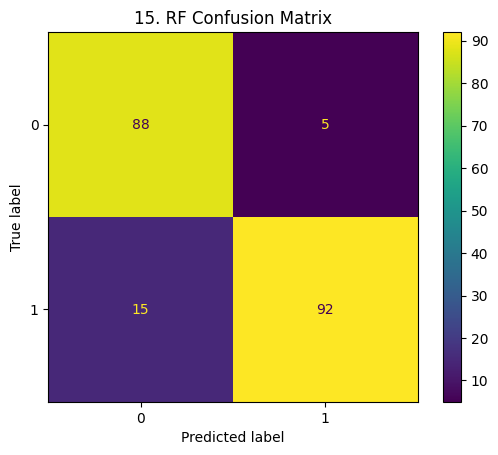

In [28]:

# 15. Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test_clf, y_test_clf)
plt.title("15. RF Confusion Matrix")
plt.show()


In [29]:

# 16. Stacking Classifier
estimators = [('dt', DecisionTreeClassifier()), ('svc', SVC(probability=True)), ('lr', LogisticRegression())]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train_clf, y_train_clf)
print("16. Stacking Accuracy:", accuracy_score(y_test_clf, stack.predict(X_test_clf)))


16. Stacking Accuracy: 0.875


In [30]:

# 17. Top 5 Feature Importances
importances = rf.feature_importances_
top_indices = np.argsort(importances)[-5:]
print("17. Top 5 Important Features:", top_indices)


17. Top 5 Important Features: [11 14  1 18  5]


In [31]:

# 18. Precision, Recall, F1
y_pred = bagging_clf.predict(X_test_clf)
p, r, f, _ = precision_recall_fscore_support(y_test_clf, y_pred, average='binary')
print(f"18. Precision: {p}, Recall: {r}, F1: {f}")


18. Precision: 0.9565217391304348, Recall: 0.822429906542056, F1: 0.8844221105527639


In [32]:

# 19. RF max_depth effect
for depth in [3, 5, 10, None]:
    model = RandomForestClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_clf, y_train_clf)
    print(f"19. Accuracy with max_depth={depth}:", accuracy_score(y_test_clf, model.predict(X_test_clf)))


19. Accuracy with max_depth=3: 0.86
19. Accuracy with max_depth=5: 0.88
19. Accuracy with max_depth=10: 0.885
19. Accuracy with max_depth=None: 0.9


In [35]:
# 20. Bagging Regressor with different base estimators
for base in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    # The parameter for the base estimator was renamed from 'base_estimator' to 'estimator' in scikit-learn v0.24
    br = BaggingRegressor(estimator=base, n_estimators=10, random_state=42)
    br.fit(X_train_reg, y_train_reg)
    print(f"20. Base {type(base).__name__} MSE:", mean_squared_error(y_test_reg, br.predict(X_test_reg)))

20. Base DecisionTreeRegressor MSE: 3222.395831454
20. Base KNeighborsRegressor MSE: 3582.321258909098


In [36]:

# 21. ROC-AUC RF
rf.fit(X_train_clf, y_train_clf)
proba = rf.predict_proba(X_test_clf)[:, 1]
print("21. ROC AUC:", roc_auc_score(y_test_clf, proba))

21. ROC AUC: 0.9379459350819013


In [37]:

# 22. Cross-validation for Bagging
cv_score = cross_val_score(bagging_clf, X_clf, y_clf, cv=5)
print("22. Bagging CV Mean Accuracy:", np.mean(cv_score))


22. Bagging CV Mean Accuracy: 0.9


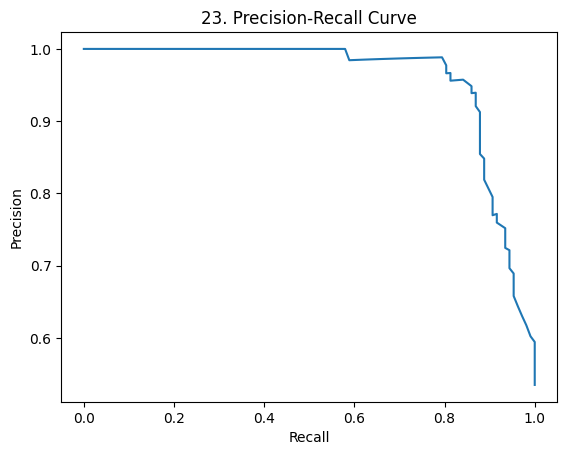

In [38]:

# 23. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_clf, proba)
plt.plot(recall, precision)
plt.title("23. Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


In [39]:

# 24. Stacking RF + Logistic Regression
stack2 = StackingClassifier(estimators=[('rf', rf), ('lr', LogisticRegression())], final_estimator=LogisticRegression())
stack2.fit(X_train_clf, y_train_clf)
print("24. Stacking (RF + LR) Accuracy:", accuracy_score(y_test_clf, stack2.predict(X_test_clf)))

24. Stacking (RF + LR) Accuracy: 0.89


In [40]:
# 25. Bootstrap sample levels in Bagging
for bootstrap in [True, False]:
    br = BaggingRegressor(DecisionTreeRegressor(), bootstrap=bootstrap, random_state=42)
    br.fit(X_train_reg, y_train_reg)
    print(f"25. Bootstrap={bootstrap} MSE:", mean_squared_error(y_test_reg, br.predict(X_test_reg)))

25. Bootstrap=True MSE: 3222.395831454
25. Bootstrap=False MSE: 6198.254638316167
